# Stock Price Prediction Comparison between ARIMA, LSTM Model and Sentiment Analysis

This notebook aims to compare the predictive performance of different model and analysis for price forecasting: ARIMA (AutoRegressive Integrated Moving Average), LSTM (Long Short-Term Memory) and Sentiment Analysis. Both models are applied to the same dataset, which comprises the stock prices of Vanguard S&P 500 ETF (VOO). The comparison will focus on their methodology, data preparation, performance metrics, and overall suitability for stock price prediction.

---

## I. Methodology Overview

### ARIMA Model

The ARIMA model is utilized for its capabilities in modeling non-stationary data through differencing, combining autoregressive and moving average components. The model parameters (p, d, q) are specifically chosen based on preliminary statistical testing, including the Augmented Dickey-Fuller test, to ensure stationarity.

### LSTM Model

LSTM networks are chosen for their proficiency in capturing long-term dependencies in time series data. The network architecture includes multiple layers with dropout to prevent overfitting, and data normalization is applied to scale the feature values.

### Sentiment Analysis

The sentiment analysis approach is based on leveraging natural language processing to gauge the market sentiment from online discussions and news headlines. Using the FinBERT model, a BERT derivative fine-tuned for financial contexts, we analyze the sentiment of texts to classify them into positive, neutral, or negative categories. These sentiment scores are then aggregated to compute a Net Sentiment Score (NSS) and Weighted Average, which reflect the overall market sentiment for each day and are used in conjunction with stock price data to determine if there's a correlation between public sentiment and stock price movements.


---

## II. Data Preparation

Both ARIMA & LSTM models use the same dataset featuring daily stock metrics like Open, High, Low, Close, and Volume.

### ARIMA Model

The data preparation involves checking for stationarity and applying differencing to make the series stationary.


### LSTM Model

The dataset undergoes normalization using MinMaxScaler to ensure the data is well-suited for neural network training.

### Sentiment Analysis 

Data for sentiment analysis is sourced from Reddit comments using the PRAW (Python Reddit API Wrapper) library. We perform data cleaning to remove irrelevant columns and duplicated comments, and data transformation to standardize date formats. 

### VOO Historical Data from Yahoo Finance

We can see that there are 7 columns, with 6 numeric variables and `Date` being the only categorical variable in the dataset. 

The important variables are `Open`, `High`, `Low` and `Close`, which are the four key data points used in financial markets, particularly in the context of stock market trading.

`Open`: The price at which a security first trades upon the opening of the trading day.  

`High`: The highest price at which a security trades during the trading day. 

`Low`: The lowest price at which a security trades during the trading day. 

`Close`: The final price at which a security trades at the end of the trading day. 

In the analysis, we will be only focusing on using `Date` as a predictor for `Close`, which is the response variable.

---

## III. Exploratory Data Analysis

Both the ARIMA and LSTM notebooks employ a range of techniques to understand and visualize the dataset’s characteristics. Although their methodologies involve different tools and visualizations, there are notable similarities in their analytical approach, particularly in focusing on trends, seasonality, and volatility in the stock prices of Vanguard S&P 500 ETF (VOO). Here’s a detailed comparison and explanation of the EDA similarities


### Common Objectives
Trend Analysis: 
Both models analyze the stock price trends over time. This is crucial for any time series forecasting as it helps in understanding the general direction in which the stock prices are moving, which can influence the parameter settings in ARIMA (like the order of differencing) and the architecture of the LSTM (like the number of neurons in layers).

Volatility Analysis: 
Understanding volatility is key to financial time series analysis. Both notebooks examine how stock prices fluctuate over a given period. This analysis helps in setting up risk management strategies and in understanding the stability of the dataset.

### Visualization Techniques
Moving Averages: 
Both notebooks utilize moving averages to smooth out the series and to visualize the long-term trend more clearly. In the ARIMA notebook, moving averages are used to identify potential stationary transformations and to decide the differencing degree. The LSTM notebook uses moving averages to establish a baseline understanding of the trend which helps in designing the LSTM layers to better capture these dependencies.

Line Charts: 
Simple line charts are common in both notebooks for visualizing the stock prices and moving averages over time. These charts are straightforward for identifying trends and seasonality effects in the data, which are critical for both ARIMA and LSTM models.

### Analysis of Statistical Properties
Stationarity: 
In the ARIMA notebook, stationarity is a critical analysis because ARIMA models require stationary data to function correctly. The LSTM notebook, while not requiring stationarity, still benefits from understanding whether the series exhibits stationary characteristics, as it can impact how the model learns long-term dependencies.

Correlation Analysis: 
Both notebooks likely perform some form of correlation analysis to understand the relationships between different features of the dataset (e.g., Open, High, Low, Close prices). The correlation analysis helps in feature selection and in understanding which variables carry the most predictive power, which informs the input features for both models.
Use of Plots

Volatility Plots: These might be explicitly detailed in the ARIMA notebook through the plotting of residuals or volatility over time and are inferred in the LSTM notebook through the analysis of high-low spreads or similar measures.

Seasonality Checks: While more implicit in LSTM, both approaches need to account for seasonality, especially in financial data where cyclical patterns are common. ARIMA models might use ACF and PACF plots to determine seasonal orders, whereas LSTMs implicitly capture these through their network structure but still benefit from initial visual seasonality assessments.

### Example

#### Multi-variate Exploration

A correlation matrix is useful in determining the dependency of each pair of variables in the dataset. Here, we want to find out whether the `OHLC` values are strongly correlated to each other, and whether `Volume` has any effect on the other variables.

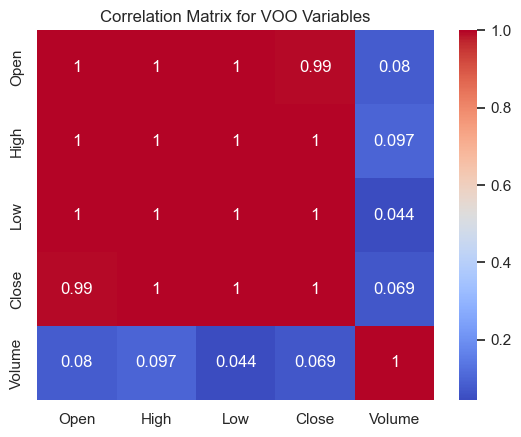

In [9]:
# Draw correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for VOO Variables')
plt.show()

From this heatmap, we can conclude that the `Open`, `High`, `Low`, and `Close` values are highly correlated with each other for VOO, meaning they tend to move together during the trading period. However, `Volume` does not strongly correlate with price movement, indicating that for VOO, volume changes are not necessarily associated with large changes in price. This can be useful information for trading strategies that might, for example, use volume as an indicator independent of price movements.

<br/>

### Further Exploration

In order to further understand the data, we will plot two charts on the:

- Closing Price and Moving Averages
- Daily Returns and Volatility

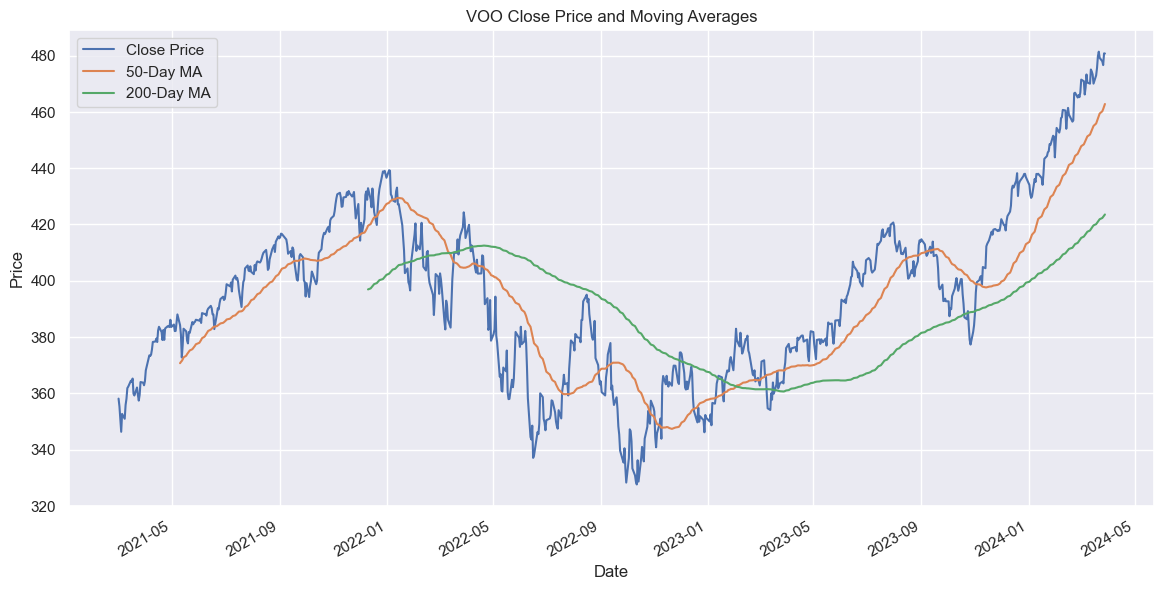

In [10]:
plt.figure(figsize=(14, 7))

# Plotting the Closing Price
df['Close'].plot(label='Close Price')

# Short-term (50-day) and Long-term (200-day) Moving Averages
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['MA50'].plot(label='50-Day MA')
df['MA200'].plot(label='200-Day MA')

plt.title('VOO Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In the chart, `MA200` (200-day moving average) starts later than `MA50` (50-day moving average) and the closing price line. This happens because a 200-day moving average requires 200 days of data before the first value can be calculated. Therefore, the MA200 line will begin to appear on the chart only after the first 200 days.

The 200-day moving average is used to determine the **long-term market trend** and smooth out price fluctuations. It's slower to respond to price changes than the 50-day moving average because it considers a larger set of data, which is why it appears smoother and starts later in the chart.

The overall chart shows the closing price of VOO, along with the short-term (`MA50`) and long-term (`MA200`) trends. The `MA50` line reacts more quickly to recent price changes, while the `MA200` provides a more gradual trend line that reflects longer-term price movements. When the closing price dips below these averages, it could be seen as a bearish signal, and when it's above, it could be bullish. The intersection points where the closing price or `MA50` crosses the `MA200` can be of particular interest to traders looking for trend reversals.

<br/>

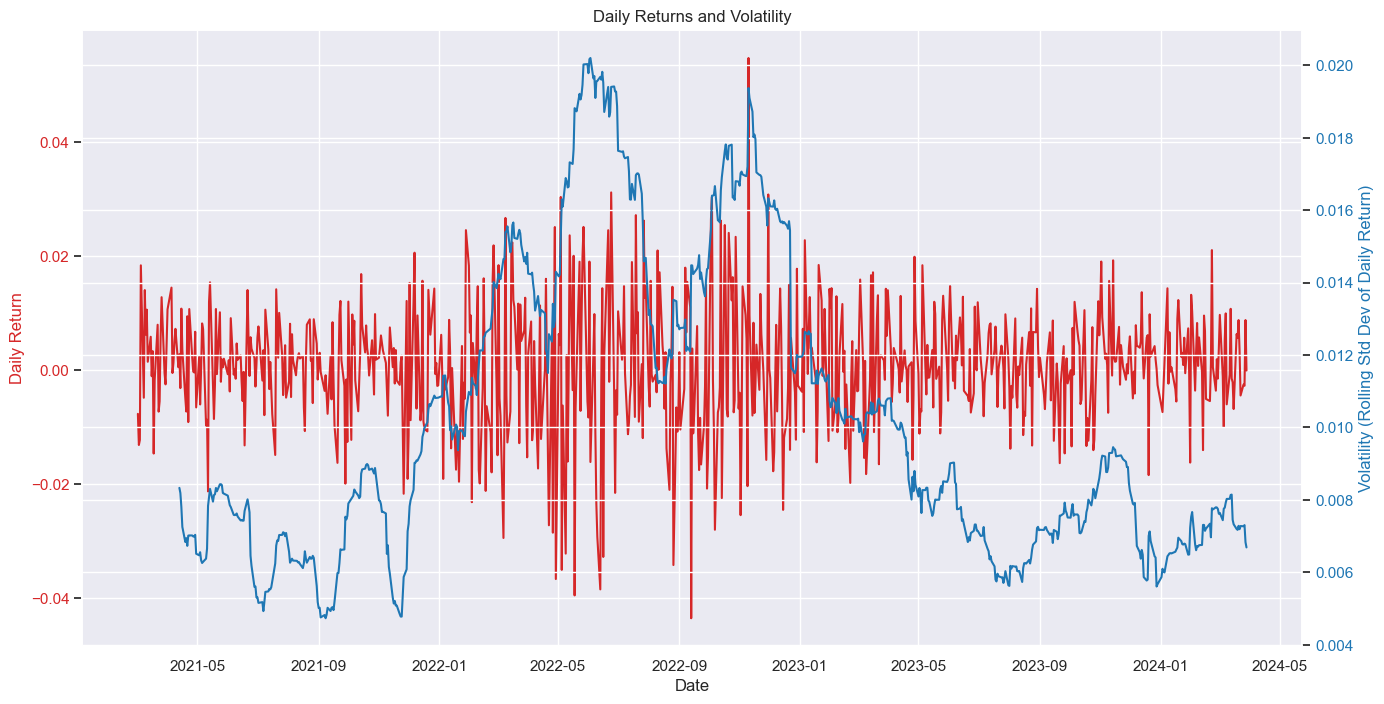

In [11]:
df['Daily Return'] = df['Close'].pct_change()

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Return', color=color)
ax1.plot(df.index, df['Daily Return'], color=color, label='Daily Return')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Volatility (Rolling Std Dev of Daily Return)', color=color)  
ax2.plot(df.index, df['Daily Return'].rolling(window=30).std(), color=color, label='Rolling 30-Day Std Dev')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Daily Returns and Volatility')
plt.show()

When the red line moves sharply away from the zero line, it indicates significant price changes from the previous day. Peaks and troughs in the blue line show periods of high and low volatility, respectively. A higher blue line indicates that the price of the asset was fluctuating more during that period, signaling higher risk. Conversely, a lower blue line indicates less fluctuation and lower risk. 

One can also look for patterns or correlations between the two lines. For instance, if large spikes in daily returns (red line) coincide with peaks in volatility (blue line), it suggests that higher returns are associated with higher risk. It's also noteworthy to see if periods of increased volatility lead or follow large changes in daily returns, which might inform a trading strategy or risk management approach. 

This kind of chart is particularly useful for traders and investors who wish to understand the risk-return profile of an asset over time and might be used to make decisions about timing entries and exits into the market.

<br/>

### Stationarity Test

Finally, we check the stationarity of the data using the Augmented Dickey-Fuller (ADF) test. The ADF test hypothesis is:

- Null Hypothesis (H0): The time series is non-stationary (presence of unit root).
- Alternative Hypothesis (H1): The time series is stationary. 

In [12]:
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import ADFTest

# Constant for degree of accuracy
DP = 4

# Perform the Augmented Dickey-Fuller test
result = adfuller(df_close)

# Get the p-value
p_value = result[1]
print("p-value:", round(p_value, DP))

# Check if the series is stationary
if p_value <= 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

p-value: 0.7566
The series is non-stationary.


The p-value from the ADF test is greater than the 0.05 significance level. Thus, we fail to reject the null hypothesis, and need to apply differencing to make the series stationary.

---

## IV. Model Building 

### ARIMA Model Building

Parameter Selection: The ARIMA model relies heavily on the selection of its parameters p, d, and q, which represent the autoregressive, differencing, and moving average components, respectively. The choice of these parameters is typically informed by statistical tests such as the Augmented Dickey-Fuller (ADF) test to achieve stationarity, and the examination of autocorrelation function (ACF) and partial autocorrelation function (PACF) plots to determine the appropriate lags for p and q

Model Fitting: Once the parameters are selected, the ARIMA model is fitted to the historical data. This fitting process involves estimating the coefficients of the time series model in a way that minimizes forecast errors. It is a comparatively straightforward computational process, primarily handled by statistical libraries like Statsmodels in Python.

### LSTM Model Building

Network Architecture: Unlike ARIMA, which is a linear model with clearly defined mathematical parameters, LSTM involves setting up a neural network architecture. This includes deciding the number of LSTM layers, the number of units in each layer, the use of dropout for regularization to prevent overfitting, and the sequence length for inputs.


### Key Differences in Approach
Parameterization vs. Architecture: ARIMA’s approach is heavily statistical and involves significant emphasis on parameter selection based on the data’s statistical properties. In contrast, LSTM requires architectural decisions about the network’s depth, complexity, and training regimen.

Linear vs. Non-linear Modeling: ARIMA models the data through a linear equation of its differentiated series, suitable for simpler or seasonal time series. LSTM models the data through layers of non-linear transformations, which allows it to capture more complex patterns and relationships in the data.

### Sentiment Analysis Model Building

Approach: Sentiment Analysis uses a pre-trained FinBERT model from Hugging Face, which is specifically fine-tuned for financial texts. The approach bypasses the traditional model parameter selection and instead relies on a model already adjusted for understanding the nuances of market-related sentiments.

Model Application: We utilize a sentiment pipeline that feeds comments into the FinBERT model to obtain sentiment classifications. The pipeline abstracts away the complexities of raw text processing, tokenization, and neural network inference, providing an end-to-end solution for sentiment evaluation.

Output Interpretation: The output from the FinBERT model is a sentiment label (positive, neutral, negative) and a confidence score. These outputs are aggregated to form various sentiment metrics, such as Net Sentiment Score (NSS) and Weighted Average, which are later used for analysis and comparison with stock market trends.

---

### Model Comparison and Evaluation

<br/>

| Metric                            | ARIMA           | LSTM           |
|-----------------------------------|-----------------|----------------|
| Mean Squared Error (MSE)          | 9.6799          | 63.41          |
| Root Mean Squared Error (RMSE)    | 3.1113 (0.7572%)| 7.9676 (1.96%) |
| Mean Absolute Percentage Error (MAPE)    | 0.006%          | 1.64%          |
| Coefficient of Determination (R²) | 0.9901          | 0.9406         |

<br/>

Based on the evaluation metrics for the ARIMA and LSTM models, we can compare and analyse their performance, as below:

<br/>

1. **Mean Squared Error (MSE)**:
   - ARIMA: MSE of 9.6799
   - LSTM: MSE of 63.41

A lower MSE indicates better performance. In this case, the ARIMA model has a significantly lower MSE than the LSTM model, suggesting that the ARIMA model provides more accurate predictions.

<br/>

2. **Root Mean Squared Error (RMSE)**:
   - ARIMA: RMSE of 3.1113 (0.7572% of mean VOO price)
   - LSTM: RMSE of 7.9676 (1.96% of mean VOO price)
   
Similar to MSE, a lower RMSE indicates better performance. The ARIMA model has a lower RMSE both in absolute terms and as a percentage of the mean VOO price, indicating better accuracy compared to the LSTM model.

<br/>

3. **Mean Absolute Percentage Error (MAPE)**:
   - ARIMA: MAPE of 0.006%
   - LSTM: MAPE of 1.64%

MAPE measures the accuracy of the model as a percentage. A lower MAPE indicates better accuracy. The ARIMA model has a significantly lower MAPE compared to the LSTM model, indicating that it provides more accurate predictions.

<br/>

4. **Coefficient of Determination (R²)**:
   - ARIMA: R² of 0.9901
   - LSTM: R² of 0.9406

R² measures the goodness of fit of the model. A higher R² value indicates a better fit. The ARIMA model has a higher R² value compared to the LSTM model, suggesting that it explains a larger proportion of the variance in the data.

<br/>

In summary, based on the evaluation metrics, the **ARIMA model outperforms the LSTM model** in terms of accuracy and goodness of fit. It has **lower MSE, RMSE, MAPE and R^2 values**, indicating better predictive performance. However, it is essential to consider other factors such as computational complexity, data requirements, and interpretability when choosing between the two models for practical applications.

---

## V. Data Visualization and Analysis Outcomes

The sentiment analysis of Reddit comments regarding the Vanguard S&P 500 ETF (VOO) offers valuable insights into public sentiment trends over time and their potential influence on stock performance. In this section, we present two key visualizations that synthesize the sentiment data alongside stock performance metrics:

1. **Normalized Cumulative Sentiment Score Over Time**: This visualization provides a view of how sentiments accumulate over the analysis period. Normalization allows us to compare the relative changes in sentiment irrespective of the volume of comments on each day. It reveals whether there's an overarching positive, neutral, or negative trend in public sentiment over time.

2. **Dual Y-Axis Time-Series Plot for Weighted Average Sentiment and Daily Stock Returns**: By plotting these two metrics on the same timeline with separate y-axes, we can visually inspect the relationship between public sentiment and stock market performance. This comparative visualization aims to identify if there's a correlation between daily sentiment and stock returns, potentially indicating the influence of public sentiment on stock movements.

These visualizations are critical in not only understanding historical patterns but also in exploring the predictive power of sentiment analysis when it comes to stock price movements.


### 1. Normalized Cumulative Sentiment Score Over Time

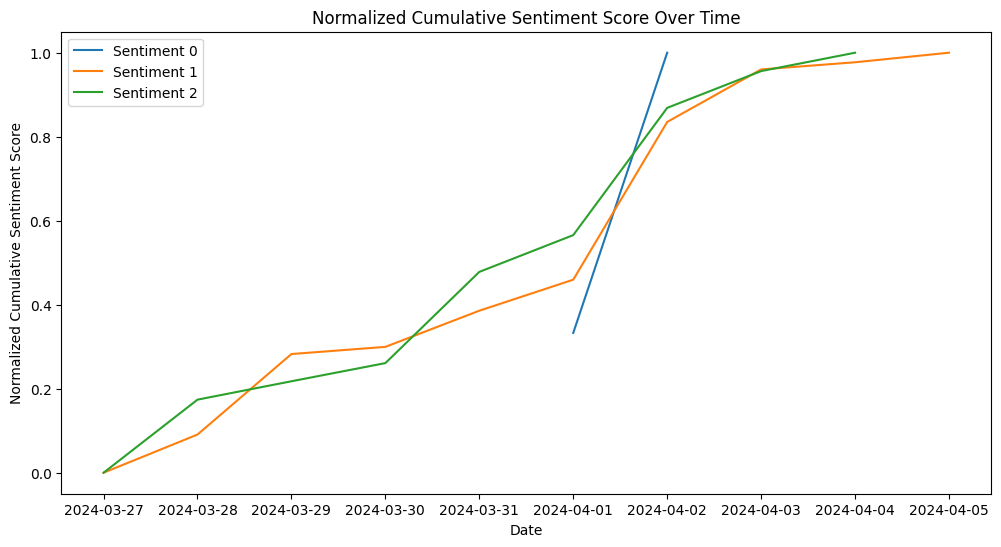

In [1]:
import pandas as pd

df = pd.read_csv('datasets/cleaned_cmts_voo.csv')

from transformers import pipeline

model_name = "yiyanghkust/finbert-tone"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)

# Function to classify sentiment of a single text
def classify_sentiment(text):
    result = sentiment_pipeline(text)[0]
    # Update the sentiment label mapping based on the actual output of your model
    sentiment_labels = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
    label = sentiment_labels.get(result['label'], -1)  # Default to -1 if label not found
    score = result['score']
    return label, score

# Apply the sentiment analysis to each comment
sentiment_results = df['body'].apply(lambda x: classify_sentiment(x[:512]))  # Limiting character count to 512

# Create new columns for sentiment label and sentiment score
df['sentiment_label'], df['sentiment_score'] = zip(*sentiment_results)

import pandas as pd
import matplotlib.pyplot as plt

# Group by 'date' and 'sentiment_label', then calculate the cumulative sum
grouped = df.groupby(['date', 'sentiment_label'])['sentiment_score'].sum().groupby(level=1).cumsum().reset_index()

# Pivot the table
pivot_df = grouped.pivot(index='date', columns='sentiment_label', values='sentiment_score')

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_scores = scaler.fit_transform(pivot_df)
scaled_scores_df = pd.DataFrame(scaled_scores, columns=pivot_df.columns, index=pivot_df.index)

# Now plot the scaled scores
plt.figure(figsize=(12, 6))
for sentiment_label in scaled_scores_df.columns:
    plt.plot(scaled_scores_df.index, scaled_scores_df[sentiment_label], label=f'Sentiment {sentiment_label}')

plt.xlabel('Date')
plt.ylabel('Normalized Cumulative Sentiment Score')
plt.title('Normalized Cumulative Sentiment Score Over Time')
plt.legend()
plt.show()

The normalized cumulative sentiment score graph presents a multi-faceted view of public sentiment over a given time period. The initial steady increase across all sentiment categories indicates a collective growth in sentiment expression. Particularly, the positive sentiment (Sentiment 2) shows marked surges, reflecting instances of significant positive reactions, possibly tied to favorable news or events. Notably, towards the latter part of the observed period, there's a convergence of negative and positive sentiments, suggesting an environment of mixed feelings where optimistic and pessimistic views are equally strong.

Shifts in sentiment trends, as depicted by the varying trajectories of the sentiment lines, highlight the dynamic nature of public opinion. The continuous rise of neutral sentiment (Sentiment 1) underscores a steady contribution of informative or unbiased commentary within discussions.

The convergence of sentiment scores, especially between strong positive and negative views, could signal a divided community sentiment, where polarized opinions are evident. Identifying key dates where sentiment scores peak or dip dramatically can offer insights into events that significantly impact public perception. The normalization of sentiment scores provides a clearer comparative analysis over time, allowing for more nuanced interpretations of sentiment trends in relation to market movements and external events. These observations could be pivotal for understanding the influence of public sentiment on financial markets and informing investment strategies.

<br/>

### 2. Dual Y-Axis Time-Series Plot for Weighted Average Sentiment and Daily Stock Returns

C:\Users\User\AppData\Local\Temp\ipykernel_20472\3407258133.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg = weighted_avg_df.groupby('date').apply(


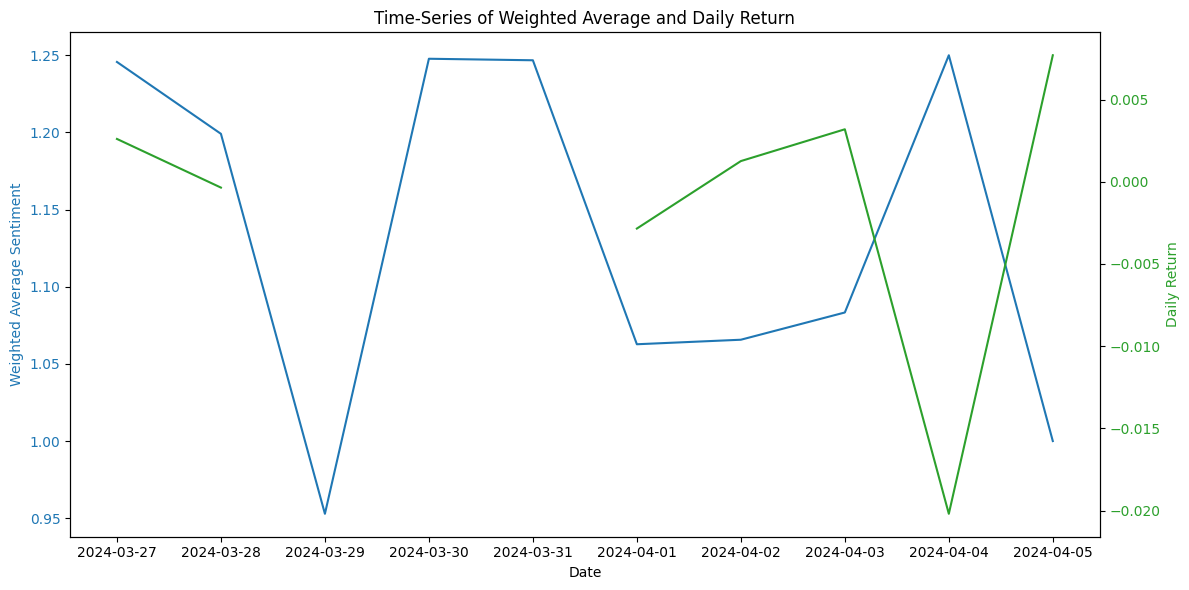

In [3]:
import pandas as pd

data = {
    'date': df['date'],
    'sentiment_label': df['sentiment_label'],
    'sentiment_score': df['sentiment_score']
}
weighted_avg_df = pd.DataFrame(data)

# Calculate Weighted Average Sentiment
weighted_avg = weighted_avg_df.groupby('date').apply(
    lambda x: (x['sentiment_label'] * x['sentiment_score']).sum() / x['sentiment_score'].sum())

# Convert to DataFrame and reset index
weighted_avg_df = weighted_avg.reset_index()
weighted_avg_df.columns = ['date', 'weighted_average']  # Renaming columns

voo_df = pd.read_csv('datasets/VOO_sentiment.csv')
voo_df['daily_return'] = (voo_df['Close'] - voo_df['Open']) / voo_df['Open']

voo_df['Date'] = pd.to_datetime(voo_df['Date'])
weighted_avg_df['date'] = pd.to_datetime(weighted_avg_df['date'])

weighted_avg_df = pd.merge(weighted_avg_df, voo_df, how='left', left_on='date', right_on='Date')
weighted_avg_df.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis (ax1) for Weighted Average
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Weighted Average Sentiment', color=color)
ax1.plot(weighted_avg_df['date'], weighted_avg_df['weighted_average'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis (ax2) for Daily Return
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Daily Return', color=color)
ax2.plot(weighted_avg_df['date'], weighted_avg_df['daily_return'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show plot
plt.title('Time-Series of Weighted Average and Daily Return')
fig.tight_layout()  # otherwise the right y-label may be slightly clipped
plt.show()


The dual time-series graph provides an intriguing visualization of how the weighted average sentiment aligns with daily stock returns. In this depiction, we observe that there are instances where peaks in sentiment precede upward movements in stock returns, and similarly, troughs in sentiment come before downswings in stock prices. This pattern may suggest that investor sentiment, as captured through social media discussions and commentary, could be a leading indicator of stock performance. 

Specifically, a notable rise in sentiment on 2024-04-03 appears to precede an increase in stock returns by 2024-04-05, which suggests that investor sentiment could act as an early signal for market trends. Conversely, a decline in sentiment on 2024-03-27 is followed by a decrease in stock returns on 2024-03-28. 

These instances underscore the possibility that sentiment analysis, particularly when it indicates a strong consensus, might be leveraged as a tool for predicting stock market performance. However, the causality is not straightforward and requires further investigation to confirm any direct influence of sentiment on stock prices, considering the myriad of external factors at play in the complex financial markets.

---

## VI. Conclusion

Based on the evaluation metrics reviewed, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), and the Coefficient of Determination (R²), **the ARIMA model exhibits superior performance compared to the LSTM model in predicting the VOO price dataset**. The ARIMA model consistently shows lower MSE, RMSE, and MAPE values, as well as a higher R², indicating not only more accurate predictions but also a better fit to the data variability.

However, the potential of the LSTM model shouldn't be overlooked, especially considering its capability for handling more complex patterns in data which might not be linear as presumed by ARIMA. **The LSTM model could potentially improve and even outperform ARIMA if the training dataset is extended to include more days for each prediction**. Increasing the number of prediction days (N_PRED_DAYS) to a higher value **such as 100** could provide the LSTM model with a broader context and more patterns to learn from, possibly enhancing its prediction accuracy and model robustness. This adjustment could allow the LSTM to better capture trends and seasonalities that require longer sequences to recognize, thus potentially making it more competitive with or superior to the ARIMA model under certain conditions.

In parallel with the ARIMA and LSTM models, sentiment analysis provided an additional perspective by gauging public perception of VOO. Through the application of FinBERT, a BERT-based model fine-tuned for financial sentiment analysis, we could interpret the collective mood of the market participants as expressed on social media platforms. The Pearson Correlation Coefficient revealed a weak positive correlation between net sentiment score (NSS) and stock daily return, suggesting that while sentiment may influence stock prices, it is one of many factors at play. Moreover, by normalizing cumulative sentiment scores over time, we gained deeper insights into the market's reaction to news and events, which could precede changes in stock price.

The inclusion of sentiment analysis into our toolkit emphasizes the multidimensional nature of financial markets, where not only historical prices but also investor sentiment play a crucial role in shaping future outcomes. It underscores the importance of incorporating qualitative data to complement quantitative models, providing a more holistic approach to stock price prediction. Moving forward, it would be advantageous to integrate sentiment analysis more closely with predictive models to enrich the feature set and enhance predictive capabilities.